<a href="https://colab.research.google.com/github/SuminBae97/PytorchStudy/blob/main/gluonts_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install mxnet


     |████████████████████████████████| 47.3 MB 93 kB/s 
  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.10.1
    Uninstalling graphviz-0.10.1:
      Successfully uninstalled graphviz-0.10.1


In [5]:
pip install --upgrade mxnet~=1.7 gluonts

     |████████████████████████████████| 2.8 MB 4.0 MB/s 
     |████████████████████████████████| 10.9 MB 25.7 MB/s 
  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 3.10.0.2
    Uninstalling typing-extensions-3.10.0.2:
      Successfully uninstalled typing-extensions-3.10.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.8.0 requires tf-estimator-nightly==2.8.0.dev2021122109, which is not installed.
arviz 0.11.4 requires typing-extensions<4,>=3.7.4.3, but you have typing-extensions 4.1.1 which is incompatible.


In [ ]:
# pip install d2l

In [ ]:
# pip install -U d2l
# pip install -U matplotlib

In [6]:
%matplotlib inline
import mxnet as mx
from mxnet import gluon
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json

Datasets

In [7]:
from gluonts.dataset.repository.datasets import get_dataset, dataset_recipes
from gluonts.dataset.util import to_pandas

/usr/local/lib/python3.7/dist-packages/gluonts/json.py:102: UserWarning: Using `json`-module for json-handling. Consider installing one of `orjson`, `ujson` to speed up serialization and deserialization.
  "Using `json`-module for json-handling. "


In [8]:
print(f"available datasets:{list(dataset_recipes.keys())}")

available datasets:['constant', 'exchange_rate', 'solar-energy', 'electricity', 'traffic', 'exchange_rate_nips', 'electricity_nips', 'traffic_nips', 'solar_nips', 'wiki-rolling_nips', 'taxi_30min', 'kaggle_web_traffic_with_missing', 'kaggle_web_traffic_without_missing', 'kaggle_web_traffic_weekly', 'm1_yearly', 'm1_quarterly', 'm1_monthly', 'nn5_daily_with_missing', 'nn5_daily_without_missing', 'nn5_weekly', 'tourism_monthly', 'tourism_quarterly', 'tourism_yearly', 'cif_2016', 'london_smart_meters_without_missing', 'wind_farms_without_missing', 'car_parts_without_missing', 'dominick', 'fred_md', 'pedestrian_counts', 'hospital', 'covid_deaths', 'kdd_cup_2018_without_missing', 'weather', 'm3_monthly', 'm3_quarterly', 'm3_yearly', 'm3_other', 'm4_hourly', 'm4_daily', 'm4_weekly', 'm4_monthly', 'm4_quarterly', 'm4_yearly', 'm5']


In [9]:
dataset = get_dataset("m4_hourly",regenerate=True)

saving time-series into /root/.mxnet/gluon-ts/datasets/m4_hourly/train/data.json
saving time-series into /root/.mxnet/gluon-ts/datasets/m4_hourly/test/data.json


In [10]:
dataset.train

In [11]:
entry = next(iter(dataset.train))
train_series = to_pandas(entry)
entry2 = next(iter(dataset.test))
test_series = to_pandas(entry2)

/usr/local/lib/python3.7/dist-packages/gluonts/dataset/common.py:324: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  timestamp = pd.Timestamp(timestamp_input, freq=freq)
/usr/local/lib/python3.7/dist-packages/gluonts/dataset/common.py:327: FutureWarning: Timestamp.freq is deprecated and will be removed in a future version
  if isinstance(timestamp.freq, Tick):
/usr/local/lib/python3.7/dist-packages/gluonts/dataset/common.py:329: FutureWarning: Timestamp.freq is deprecated and will be removed in a future version
  timestamp.floor(timestamp.freq), timestamp.freq
/usr/local/lib/python3.7/dist-packages/gluonts/dataset/common.py:329: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  timestamp.floor(timestamp.freq), timestamp.freq
/usr/local/lib/python3.7/dist-packages/gluonts/dataset/util.py:136: FutureWarning: Timestamp.freqstr is deprecated and will be removed in a future versi

In [15]:
train_series.shape , test_series.shape

((700,), (748,))

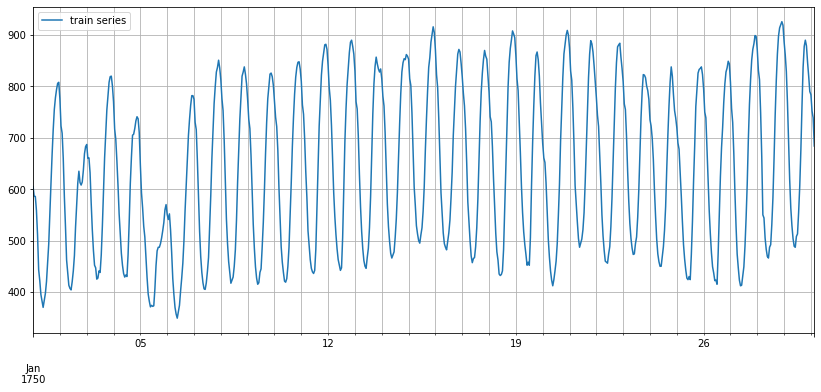

In [16]:
plt.figure(figsize=(14,6))
train_series.plot()
plt.grid(which='both')
plt.legend(["train series"],loc='upper left')
plt.show()

In [17]:
train_series.index[-1]

Timestamp('1750-01-30 03:00:00', freq='H')

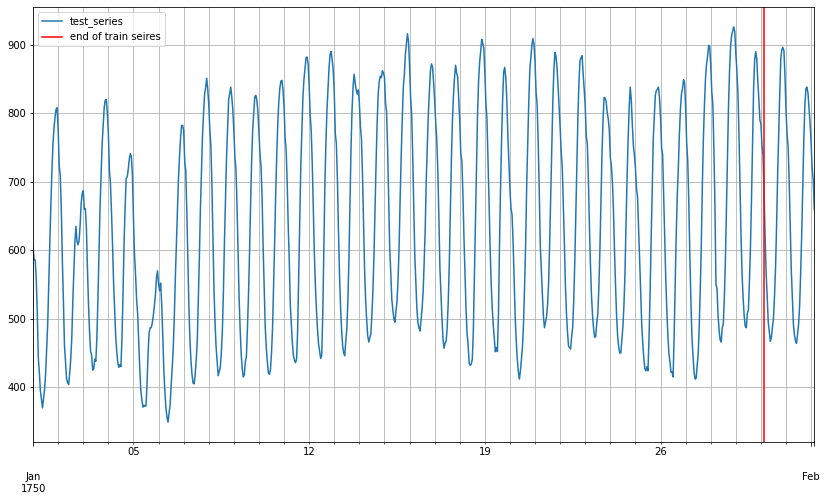

In [18]:
plt.figure(figsize=(14,8))
test_series.plot()
plt.axvline(train_series.index[-1],color='r')
plt.grid(which='both')
plt.legend(['test_series','end of train seires'])


In [19]:
train_series.index[0]

Timestamp('1750-01-01 00:00:00', freq='H')

In [20]:
# from gluonts.dataset.common import ListDataset
# training_data = ListDataset(
#     [{"start": df.index[0], "target": df.value[:"2015-04-05 00:00:00"]}],
#     freq = "5min"
# )

In [24]:
from gluonts.dataset.common import ListDataset
from gluonts.model.simple_feedforward import SimpleFeedForwardEstimator
from gluonts.mx import Trainer
from gluonts.model.deepar import DeepAREstimator

In [ ]:
# estimator = DeepAREstimator(freq="5min", prediction_length=12, trainer=Trainer(epochs=10))
# predictor = estimator.train(training_data=training_data)

In [52]:
sp_estimator = SimpleFeedForwardEstimator(
    num_hidden_dimensions=[10],
    #48개 length 예측
    prediction_length=dataset.metadata.prediction_length,
    context_length=100,
    #freq : 1h
    freq = dataset.metadata.freq,
    trainer = Trainer(
        ctx='cpu',
        epochs=15,
        learning_rate=1e-3,
        num_batches_per_epoch=256
    )

)
sp_predictor = sp_estimator.train(dataset.train)

  0%|          | 0/256 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/gluonts/transform/split.py:36: FutureWarning: Timestamp.freq is deprecated and will be removed in a future version
  return _shift_timestamp_helper(ts, ts.freq, offset)
/usr/local/lib/python3.7/dist-packages/gluonts/transform/split.py:36: FutureWarning: Timestamp.freq is deprecated and will be removed in a future version
  return _shift_timestamp_helper(ts, ts.freq, offset)
100%|██████████| 256/256 [00:03<00:00, 72.87it/s, epoch=15/15, avg_epoch_loss=4.36]


dataset.metadata.prediction_length

In [53]:
from gluonts.evaluation import make_evaluation_predictions

forecast_it, ts_it = make_evaluation_predictions(
    dataset=dataset.test,  # test dataset
    predictor=sp_predictor,  # predictor
    num_samples=100,  # number of sample paths we want for evaluation
)


In [54]:
forecasts = list(forecast_it)
tss = list(ts_it)

/usr/local/lib/python3.7/dist-packages/gluonts/transform/split.py:36: FutureWarning: Timestamp.freq is deprecated and will be removed in a future version
  return _shift_timestamp_helper(ts, ts.freq, offset)


Deep AR

In [55]:
ar_estimator = DeepAREstimator(
    freq = dataset.metadata.freq,
    prediction_length=dataset.metadata.prediction_length, 
    trainer=Trainer(epochs=15))


ar_predictor = ar_estimator.train(dataset.train)

/usr/local/lib/python3.7/dist-packages/gluonts/transform/split.py:36: FutureWarning: Timestamp.freq is deprecated and will be removed in a future version
  return _shift_timestamp_helper(ts, ts.freq, offset)
/usr/local/lib/python3.7/dist-packages/gluonts/transform/feature.py:352: FutureWarning: Timestamp.freq is deprecated and will be removed in a future version
  self._min_time_point, self._max_time_point, freq=start.freq
  0%|          | 0/50 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/gluonts/transform/split.py:36: FutureWarning: Timestamp.freq is deprecated and will be removed in a future version
  return _shift_timestamp_helper(ts, ts.freq, offset)
100%|██████████| 50/50 [00:08<00:00,  5.73it/s, epoch=15/15, avg_epoch_loss=4.36]


In [56]:
forecast_it_ar, ts_it_ar = make_evaluation_predictions(
    dataset=dataset.test,  # test dataset
    predictor=ar_predictor,  # predictor
    num_samples=100,  # number of sample paths we want for evaluation
)

forecasts_ar = list(forecast_it_ar)
tss_ar = list(ts_it_ar)

/usr/local/lib/python3.7/dist-packages/gluonts/transform/split.py:36: FutureWarning: Timestamp.freq is deprecated and will be removed in a future version
  return _shift_timestamp_helper(ts, ts.freq, offset)


In [60]:
from sklearn.metrics import mean_absolute_error
def MAPE(y_test, y_pred):
	return np.mean(np.abs((y_test - y_pred) / y_test)) * 100 
#mean_absolute_error(y_test, y_pred)

In [67]:
def compare_result(i):
    prediction = forecasts[i].mean
    prediction_ar = forecasts_ar[i].mean


    y = tss[i][700:748].to_numpy().reshape(-1)

    mape_sp = round(MAPE(y,prediction),3)
    mape_ar = round(MAPE(y,prediction_ar),3)

    plt.figure(figsize=(14,8))
    plt.plot(prediction,label=f'forcast_simple_feed mape:{mape_sp}')
    plt.plot(prediction_ar,label = f'deepar mape{mape_ar}',color='red')
    plt.plot(y,label='truth')
    plt.legend()


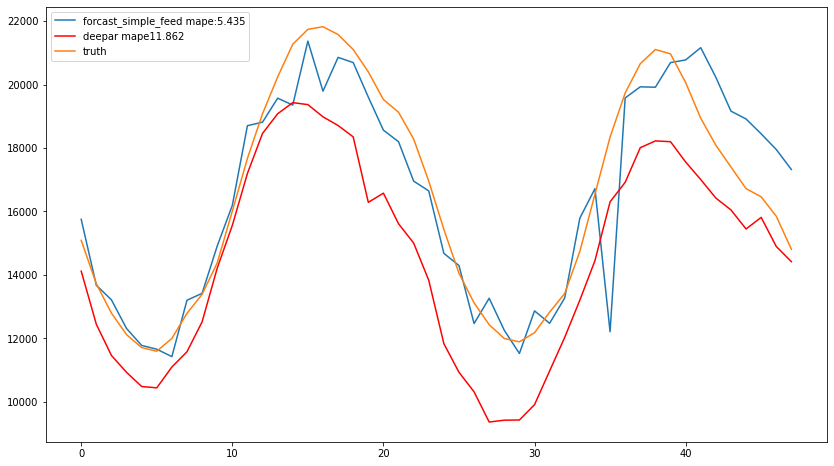

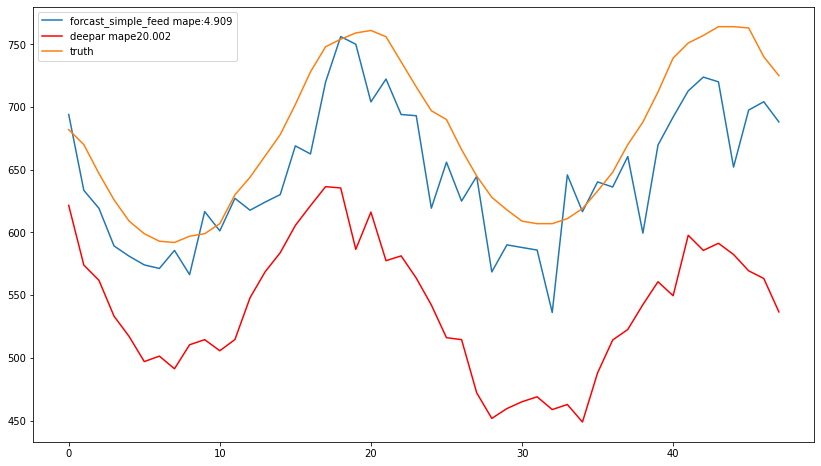

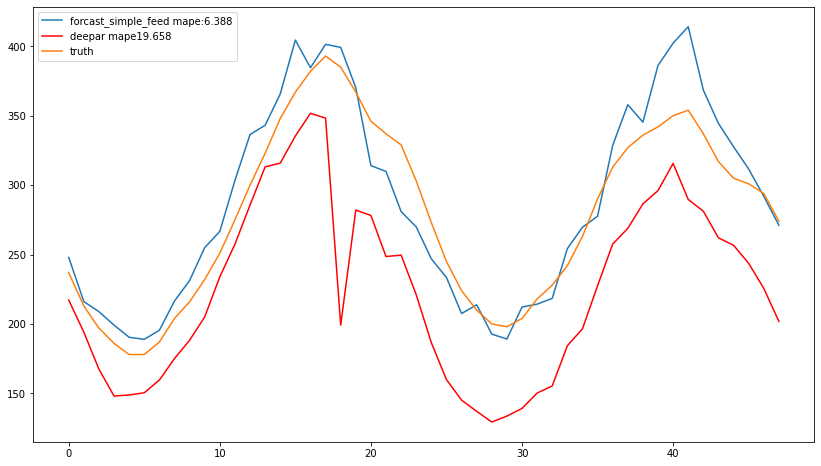

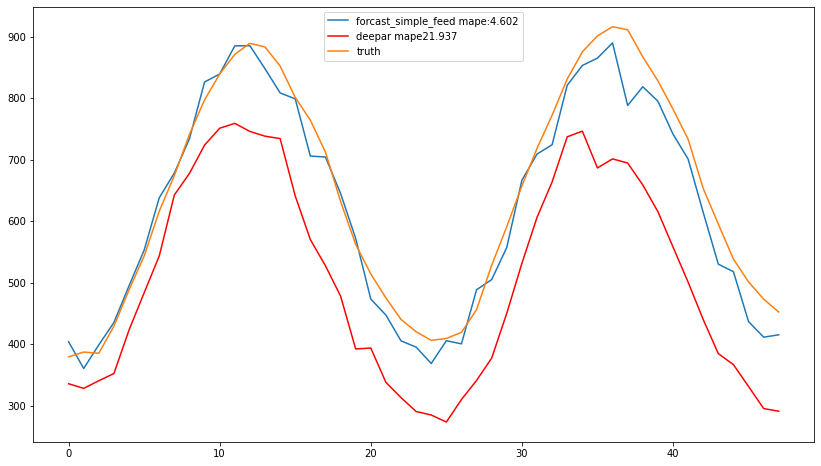

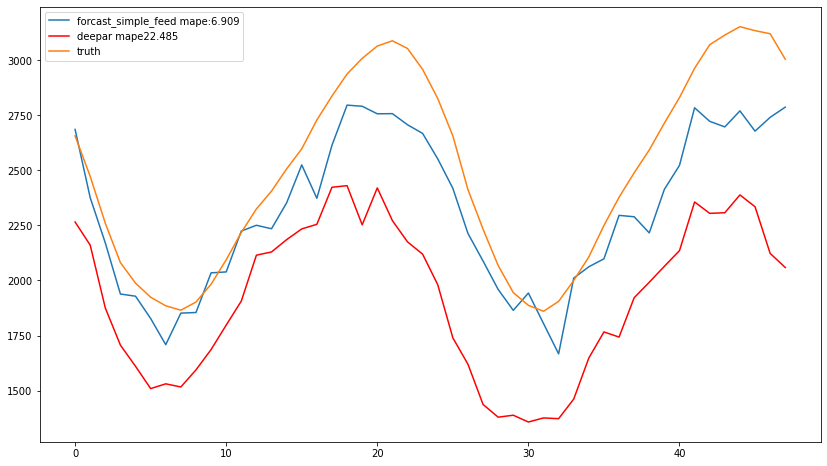

In [68]:
for i in range(20,25):
    compare_result(i)